<a href="https://colab.research.google.com/github/holydiver-zerog/repository-public/blob/main/DLtest4_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# list4.15.py
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=6ee7dcb445e454f0c66d273bfdcd8681591c44f3ad688dd28d28c8778cb2a4bd
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


In [2]:
# list4.16.py
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"学習データ（問題画像）　：{x_train.shape}")
print(f"テストデータ（問題画像）：{x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
学習データ（問題画像）　：(60000, 28, 28)
テストデータ（問題画像）：(10000, 28, 28)


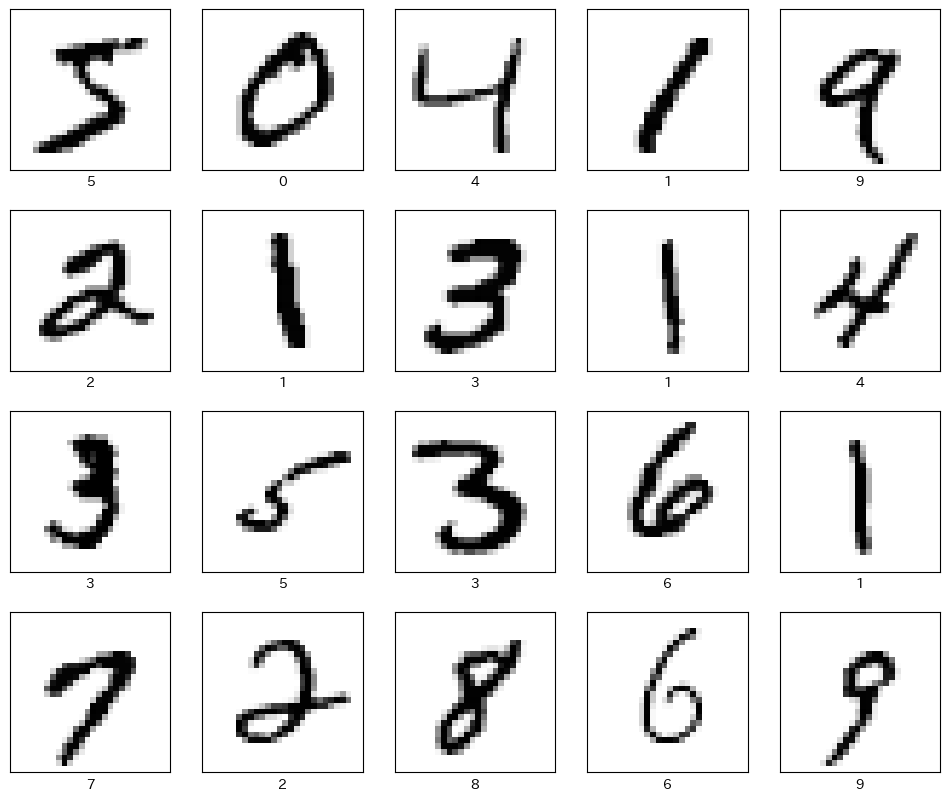

In [3]:
# list4.17.py
def disp_data(xdata, ydata):
    plt.figure(figsize=(12,10))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i], cmap="Greys")
        plt.xlabel(ydata[i])
    plt.show()

disp_data(x_train, y_train)

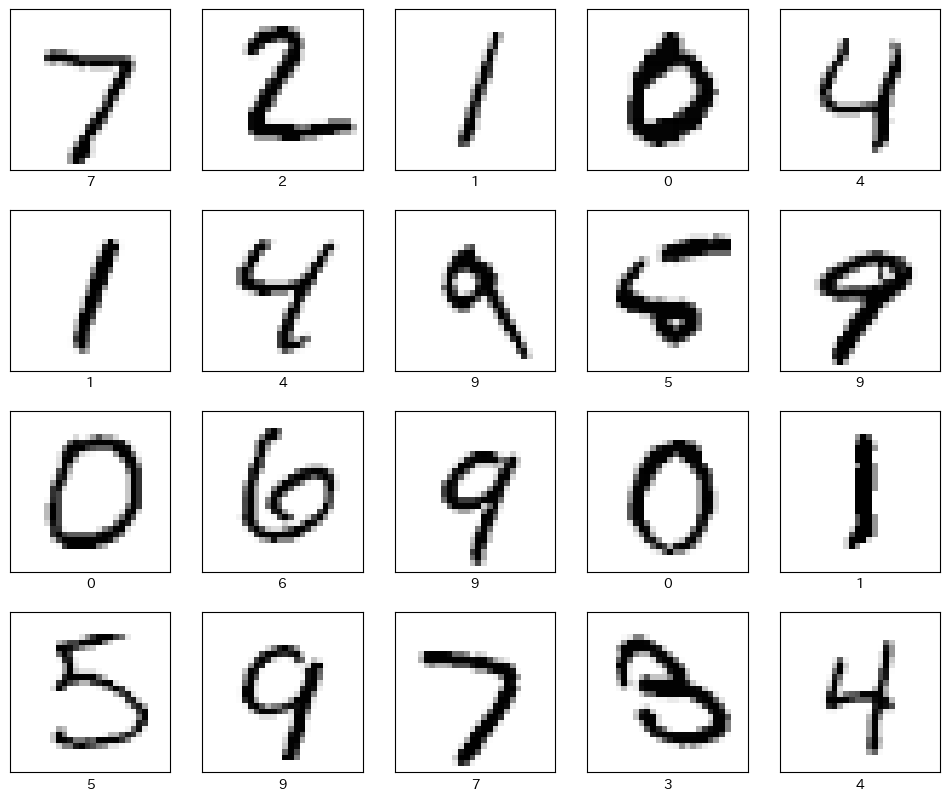

In [4]:
# list4.18.py
disp_data(x_test, y_test)

In [5]:
# list4.19.py
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# list4.20.py
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, #10
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8747 - loss: 0.4426 - val_accuracy: 0.9564 - val_loss: 0.1482
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9619 - loss: 0.1283 - val_accuracy: 0.9677 - val_loss: 0.1064
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9740 - loss: 0.0837 - val_accuracy: 0.9737 - val_loss: 0.0833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9812 - loss: 0.0606 - val_accuracy: 0.9711 - val_loss: 0.0890
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9863 - loss: 0.0432 - val_accuracy: 0.9745 - val_loss: 0.0861
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9892 - loss: 0.0345 - val_accuracy: 0.9773 - val_loss: 0.0779
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9913 - loss: 0.0288 - val_accuracy: 0.9783 - val_loss: 0.0719
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9939 - loss: 0.0205 

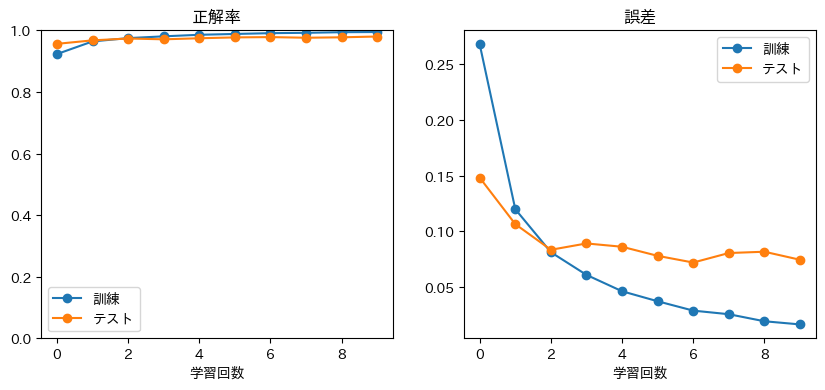

In [7]:
# list4.21.py
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


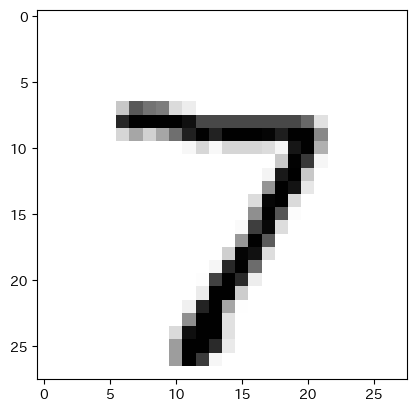

この画像は「7」です。 (99.97%)
正解は「7」です。


In [8]:
# list4.22.py
pre = model.predict(x_test)

i = 0
plt.imshow(x_test[i], cmap="Greys")
plt.show()

index = np.argmax(pre[i])
pct = pre[i][index]
print(f"この画像は「{index}」です。 ({pct:.2%})")
print(f"正解は「{y_test[i]}」です。")

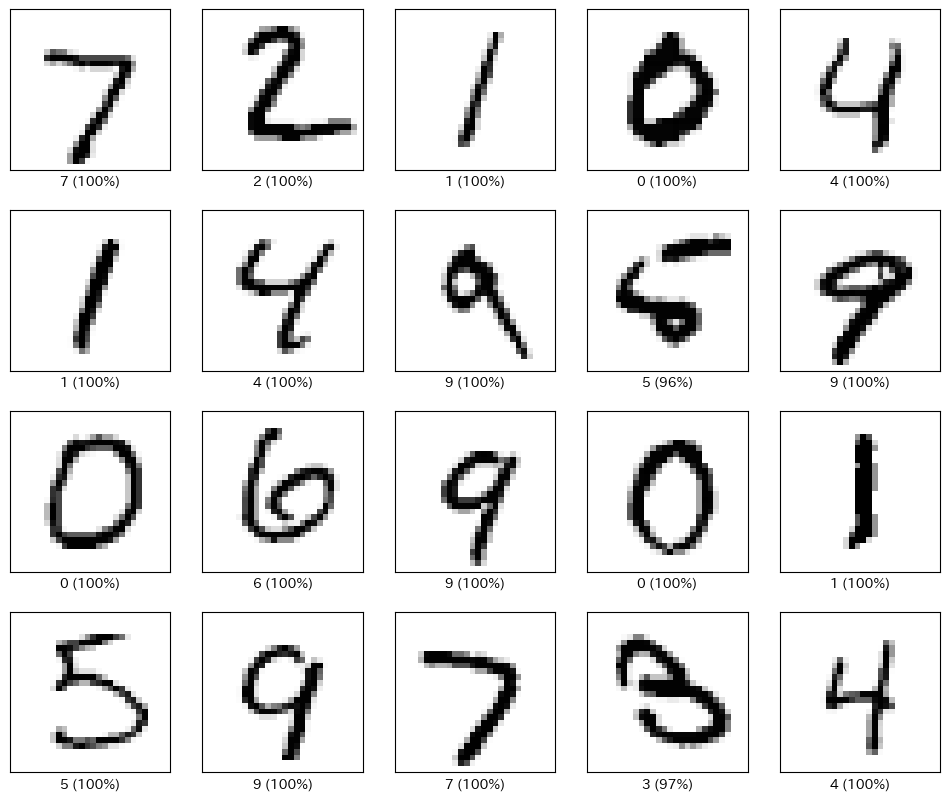

In [9]:
# list4.23.py
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap="Greys")

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans = ""
    if index != y_test[i]:
        ans = "x--o["+str(y_test[i])+"]"
    lbl = f"{index} ({pct:.0%}){ans}"
    plt.xlabel(lbl)
plt.show()